# Health and Academic Success

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
bay_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
bay_districts = ['Alameda Unified', 'Albany Unified', 'Berkeley Unified', 'Castro Valley Unified', 
                 'Dublin Unified', 'Emery Unified', 'Fremont Unified', 'Hayward Unified', 
                 'Livermore Valley Joint Unified', 'Mountain House Elementary', 'New Haven Unified', 
                 'Newark Unified', 'Oakland Unified', 'Piedmont City Unified', 'Pleasanton Unified', 
                 'San Leandro Unified', 'San Lorenzo Unified', 'Sunol Glen Unified', 
                 'Acalanes Union High', 'Antioch Unified', 'Brentwood Union Elementary', 'Byron Union Elementary', 
                 'Canyon Elementary', 'John Swett Unified', 'Knightsen Elementary', 'Lafayette Elementary', 
                 'Liberty Union High', 'Martinez Unified', 'Moraga Elementary', 'Mt. Diablo Unified', 
                 'Oakley Union Elementary', 'Orinda Union Elementary', 'Pittsburg Unified', 
                 'San Ramon Valley Unified', 'Walnut Creek Elementary', 'West Contra Costa Unified', 
                 'Bolinas-Stinson Union', 'Kentfield Elementary', 'Laguna Joint Elementary', 'Lagunitas Elementary', 
                 'Larkspur-Corte Madera', 'Mill Valley Elementary', 'Miller Creek Elementary', 'Nicasio', 
                 'Novato Unified', 'Reed Union Elementary', 'Ross Elementary', 'Ross Valley Elementary', 
                 'San Rafael City Elementary', 'San Rafael City High', 'Sausalito Marin City', 'Shoreline Unified', 
                 'Tamalpais Union High', 
                 'Calistoga Joint Unified', 'Howell Mountain Elementary',
                 'Napa Valley Unified', 'Pope Valley Union Elementary', 'Saint Helena Unified', 
                 'San Francisco Unified', 
                 'Bayshore Elementary', 'Belmont-Redwood Shores Elementary',
                 'Brisbane Elementary', 'Burlingame Elementary', 'Cabrillo Unified', 'Hillsborough City Elementary', 
                 'Jefferson Elementary', 'Jefferson Union High', 'La Honda-Pescadero Unified', 
                 'Las Lomitas Elementary', 'Menlo Park City Elementary', 'Millbrae Elementary', 'Pacifica', 
                 'Portola Valley Elementary', 'Ravenswood City Elementary', 'Redwood City Elementary', 
                 'San Bruno Park Elementary', 'San Carlos Elementary', 'San Mateo Union High', 
                 'San Mateo-Foster City', 'Sequoia Union High', 'South San Francisco Unified', 
                 'Woodside Elementary', 
                 'Alum Rock Union Elementary', 'Berryessa Union Elementary', 'Cambrian', 
                 'Campbell Union', 'Campbell Union High', 'Cupertino Union', 'East Side Union High', 
                 'Evergreen Elementary', 'Franklin-McKinley Elementary', 'Fremont Union High', 'Gilroy Unified', 
                 'Lakeside Joint', 'Loma Prieta Joint Union Elementary', 'Los Altos Elementary', 
                 'Los Gatos Union Elementary', 'Los Gatos-Saratoga Joint Union High', 'Luther Burbank', 
                 'Milpitas Unified', 'Moreland', 'Morgan Hill Unified', 'Mount Pleasant Elementary', 
                 'Mountain View Whisman', 'Mountain View-Los Altos Union High', 'Oak Grove Elementary', 
                 'Orchard Elementary', 'Palo Alto Unified', 'San Jose Unified', 'Santa Clara Unified', 
                 'Saratoga Union Elementary', 'Sunnyvale', 'Union Elementary', 
                 'Benicia Unified', 'Dixon Unified', 'Fairfield-Suisun Unified', 'Travis Unified', 
                 'Vacaville Unified', 'Vallejo City Unified', 
                 'Alexander Valley Union Elementary', 'Bellevue Union', 'Bennett Valley Union Elementary', 
                 'Cinnabar Elementary', 'Cloverdale Unified', 'Cotati-Rohnert Park Unified', 'Dunham Elementary', 
                 'Forestville Union Elementary', 'Fort Ross Elementary', 'Geyserville Unified', 
                 'Gravenstein Union Elementary', 'Guerneville Elementary', 'Harmony Union Elementary', 
                 'Healdsburg Unified', 'Horicon Elementary', 'Kashia Elementary', 'Kenwood', 'Liberty Elementary', 
                 'Mark West Union Elementary', 'Monte Rio Union Elementary', 'Montgomery Elementary', 
                 'Oak Grove Union Elementary', 'Old Adobe Union', 'Petaluma City Elementary', 
                 'Petaluma Joint Union High', 'Piner-Olivet Union Elementary', 'Rincon Valley Union Elementary', 
                 'Roseland', 'Santa Rosa Elementary', 'Santa Rosa High', 'Sebastopol Union Elementary', 
                 'Sonoma Valley Unified', 'Twin Hills Union Elementary', 'Two Rock Union', 'Waugh Elementary', 
                 'West Side Union Elementary', 'West Sonoma County Union High', 'Wilmar Union Elementary', 
                 'Windsor Unified', 'Wright Elementary']
district_to_county = {'Alameda': ['Alameda Unified', 'Albany Unified', 'Berkeley Unified', 'Castro Valley Unified', 
                                  'Dublin Unified', 'Emery Unified', 'Fremont Unified',
                                  'Hayward Unified', 'Livermore Valley Joint Unified', 'Mountain House Elementary', 
                                  'New Haven Unified', 'Newark Unified', 'Oakland Unified', 
                                  'Piedmont City Unified', 'Pleasanton Unified', 'San Leandro Unified', 
                                  'San Lorenzo Unified', 'Sunol Glen Unified'], 
                      'Contra Costa': ['Acalanes Union High', 'Antioch Unified', 'Brentwood Union Elementary', 
                                       'Byron Union Elementary', 'Canyon Elementary', 'John Swett Unified', 
                                       'Knightsen Elementary', 'Lafayette Elementary', 'Liberty Union High', 
                                       'Martinez Unified', 'Moraga Elementary', 'Mt. Diablo Unified', 
                                       'Oakley Union Elementary', 'Orinda Union Elementary', 'Pittsburg Unified', 
                                       'San Ramon Valley Unified', 'Walnut Creek Elementary', 
                                       'West Contra Costa Unified'], 
                      'Marin': ['Bolinas-Stinson Union', 'Kentfield Elementary', 'Laguna Joint Elementary', 
                                'Lagunitas Elementary', 'Larkspur-Corte Madera', 'Mill Valley Elementary', 
                                'Miller Creek Elementary', 'Nicasio', 'Novato Unified', 'Reed Union Elementary', 
                                'Ross Elementary', 'Ross Valley Elementary', 'San Rafael City Elementary', 
                                'San Rafael City High', 'Sausalito Marin City', 'Shoreline Unified',
                                'Tamalpais Union High'], 
                      'Napa': ['Calistoga Joint Unified', 'Howell Mountain Elementary', 'Napa Valley Unified', 
                               'Pope Valley Union Elementary', 'Saint Helena Unified'], 
                      'San Francisco': ['San Francisco Unified'], 
                      'San Mateo': ['Bayshore Elementary', 'Belmont-Redwood Shores Elementary', 
                                    'Brisbane Elementary', 'Burlingame Elementary', 'Cabrillo Unified', 
                                    'Hillsborough City Elementary', 'Jefferson Elementary', 'Jefferson Union High', 
                                    'La Honda-Pescadero Unified', 'Las Lomitas Elementary', 
                                    'Menlo Park City Elementary', 'Millbrae Elementary', 'Pacifica', 
                                    'Portola Valley Elementary', 'Ravenswood City Elementary', 
                                    'Redwood City Elementary', 'San Bruno Park Elementary', 
                                    'San Carlos Elementary', 'San Mateo Union High', 'San Mateo-Foster City', 
                                    'Sequoia Union High', 'South San Francisco Unified', 'Woodside Elementary'], 
                      'Santa Clara': ['Alum Rock Union Elementary', 'Berryessa Union Elementary', 'Cambrian',
                                      'Campbell Union', 'Campbell Union High', 'Cupertino Union', 
                                      'East Side Union High', 'Evergreen Elementary', 
                                      'Franklin-McKinley Elementary', 'Fremont Union High', 'Gilroy Unified', 
                                      'Lakeside Joint', 'Loma Prieta Joint Union Elementary', 
                                      'Los Altos Elementary', 'Los Gatos Union Elementary', 
                                      'Los Gatos-Saratoga Joint Union High', 'Luther Burbank', 'Milpitas Unified', 
                                      'Moreland', 'Morgan Hill Unified', 'Mount Pleasant Elementary', 
                                      'Mountain View Whisman', 'Mountain View-Los Altos Union High', 
                                      'Oak Grove Elementary', 'Orchard Elementary', 'Palo Alto Unified', 
                                      'San Jose Unified', 'Santa Clara Unified', 'Saratoga Union Elementary', 
                                      'Sunnyvale', 'Union Elementary',], 
                      'Solano': ['Benicia Unified', 'Dixon Unified', 'Fairfield-Suisun Unified', 'Travis Unified',
                                 'Vacaville Unified', 'Vallejo City Unified'], 
                      'Sonoma': ['Alexander Valley Union Elementary', 'Bellevue Union', 
                                 'Bennett Valley Union Elementary', 'Cinnabar Elementary', 'Cloverdale Unified', 
                                 'Cotati-Rohnert Park Unified', 'Dunham Elementary', 'Forestville Union Elementary',
                                 'Fort Ross Elementary', 'Geyserville Unified', 'Gravenstein Union Elementary', 
                                 'Guerneville Elementary', 'Harmony Union Elementary', 'Healdsburg Unified', 
                                 'Horicon Elementary', 'Kashia Elementary', 'Kenwood', 'Liberty Elementary', 
                                 'Mark West Union Elementary', 'Monte Rio Union Elementary', 
                                 'Montgomery Elementary', 'Oak Grove Union Elementary', 'Old Adobe Union', 
                                 'Petaluma City Elementary', 'Petaluma Joint Union High', 
                                 'Piner-Olivet Union Elementary', 'Rincon Valley Union Elementary', 'Roseland', 
                                 'Santa Rosa Elementary', 'Santa Rosa High', 'Sebastopol Union Elementary', 
                                 'Sonoma Valley Unified', 'Twin Hills Union Elementary', 'Two Rock Union', 
                                 'Waugh Elementary', 'West Side Union Elementary', 'West Sonoma County Union High', 
                                 'Wilmar Union Elementary', 'Windsor Unified', 'Wright Elementary']}

## The Data

This data gives the percent of students in the grades 5, 7 or 9 that are physically fit per county in California. There is a section that splits per gender and entries that comprise all students. I chose this data file because it gives an estimate on physical fitness for students grouped by county.

The data is taken from https://data.chhs.ca.gov/dataset/percentage-of-physically-fit-students-lghc-indicator-8/resource/d3234ded-55ac-4ff9-9dee-7dde87e078e3.

In [3]:
fit_students = pd.read_csv('data/percentage-of-physically-fit-students-lghc-indicator-8.csv')
fit_students

,LGHC Indicator Name,Year,Strata,Strata Name,Geography,Grade Lev,Numerator,Denominator,Percent,LCI,UCI,Stardard Error,RSE,warning
0,score 6 of 6,1998-1999,NaN,All Students,Alameda,Grade 5,2711.0,12808.0,21.17,20.46,21.88,0.36,1.70,NaN
1,score 6 of 6,1998-1999,NaN,All Students,Alameda,Grade 7,2549.0,11493.0,22.18,21.42,22.94,0.39,1.76,NaN
2,score 6 of 6,1998-1999,NaN,All Students,Alameda,Grade 9,1986.0,10105.0,19.65,18.87,20.43,0.40,2.04,NaN
3,score 6 of 6,1998-1999,NaN,All Students,Amador,Grade 5,28.0,319.0,8.78,5.68,11.88,1.58,18.00,NaN
4,score 6 of 6,1998-1999,NaN,All Students,Amador,Grade 7,5.0,356.0,1.40,0.18,2.62,0.62,44.29,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37231,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 7,310.0,1202.0,25.79,23.32,28.26,1.26,4.89,NaN
37232,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 9,380.0,1075.0,35.35,32.49,38.21,1.46,4.13,NaN
37233,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 5,174.0,584.0,29.79,26.09,33.49,1.89,6.34,NaN
37234,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 7,166.0,548.0,30.29,26.45,34.13,1.96,6.47,NaN


Health index of schools in California. Includes data on various different health factors. I chose this data file because it gives many different indicators for both physical and mental health.

This data is taken from https://www.schoolhealthcenters.org/school-based-health/student-health-index/.

A report of the data can be found here: https://www.schoolhealthcenters.org/wp-content/uploads/2023/10/Student-Health-Index-Full-Report-2023.pdf.

In [4]:
health_index = pd.read_csv('data/Sheet 1_data.tsv', sep='\t')
health_index

,Latitude,Longitude,Totalenrollment,Asthmaer Rate,Bipoc Over90,Ca Av Asthmaer Rate,Ca Av Chronicabsenteeismrate,Ca Av Diabetes Crudeprev,Ca Av Hosp Mentalhealth,Ca Av Hpi Index,...,Percentfrpl Quartile,Percentfrpl,Percenthomeless,Percentnonwhite,School,Schools In County,Schools In District,Suspensionratetotal,Urban,vehicle_access
0,34.033860,-118.18582,14965,56.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,6,75.900001526,0.699999988,90.900001526,City of Angels,2005,938,0,urban,12.0
1,38.609400,-121.34676,6696,61.1,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,3.200000048,49.900001526,Visions In Education,346,69,0,urban,2.3
2,34.261787,-118.52343,5675,27.9,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,0.300000012,72.300003052,Granada Hills Charter,2005,938,0.3,urban,6.1
3,36.753917,-119.78923,4733,110.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,8,91.599998474,0.300000012,92.5,J. E. Young Academic Center,290,103,0.4,urban,14.5
4,33.954072,-117.56779,4580,31.8,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,58,0.200000003,83.099998474,Eleanor Roosevelt High,454,50,2.8,urban,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,39.534341,-123.45338,101,44.3,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,66.300003052,0,21.100000381,Sherwood,37,7,0,rural,5.8
8575,33.347369,-117.23808,100,24.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,82,1,87.300003052,Ivy High (Continuation),670,2,2.7,urban,0.8
8576,34.299866,-118.83203,100,29.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,2,11,0,36.900001526,The High School at Moorpark College,187,10,3.9,urban,3.3
8577,34.643112,-120.45905,100,49.6,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,75,7,74.5,Mission Valley,100,16,0,urban,12.2


Graduation rates per year from the 2017-2018, 2018-2019, 2019-2020, 2020-2021, and 2021-2022 school years in California. 2020-2021 and 2021-2022 school years may show lower rates due to online school during COVID.

This data is taken from here: https://www.cde.ca.gov/ds/ad/filesfycgr.asp.

In [5]:
grad_rate_17_18 = pd.read_csv("data/fycgr18.txt", sep="\t")
grad_rate_17_18

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,989,13.6,1928,26.5,80,1.0,62,0.8,615,7.6
1,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,599,8.1,1567,21.1,103,1.2,89,1.0,1076,12.4
2,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,685,19.9,1570,45.7,26,0.7,22,0.6,150,4.1
3,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,30,1.8,112,6.8,30,1.4,22,1.1,384,18.4
4,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1,2.6,4,10.3,1,1.6,5,8.1,17,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196857,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,0.3,4,0.4,42,4.4,589,62.4
196858,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,10,1.0,46,1.3,212,6.0,2242,63.2
196859,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,1,1.2,1,1.2,2,1.0,12,6.3,93,48.4
196860,2017-18,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,16,0.2,49,0.7,306,1.4,1294,6.0,12640,58.9


In [6]:
grad_rate_18_19 = pd.read_csv("data/fycgr19.txt", sep="\t")
grad_rate_18_19

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1365,17.4,2353,30.0,102,1.2,66,0.8,528,6.2
1,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,841,10.8,1913,24.5,152,1.7,88,1.0,919,10.3
2,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1066,26.6,2057,51.3,66,1.6,16,0.4,110,2.6
3,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,41,2.5,90,5.5,37,1.9,10,0.5,282,14.4
4,2018-19,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,3,5.5,5,9.1,0,0.0,3,4.0,17,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198491,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,1,0.3,4,1.1,8,0.7,61,5.6,672,61.6
198492,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,1,0.1,11,1.1,52,1.5,176,5.0,2323,65.6
198493,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,5,2.8,11,6.1,94,52.2
198494,2018-19,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,25,0.3,117,1.5,344,1.5,1184,5.1,13949,60.2


In [7]:
grad_rate_19_20 = pd.read_csv("data/fycgr20.txt", sep="\t")
grad_rate_19_20

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1207,15.8,2363,30.9,96,1.2,66,0.8,490,5.9
1,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,833,10.7,2010,25.7,164,1.8,105,1.2,927,10.3
2,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,884,23.0,2022,52.5,48,1.2,8,0.2,97,2.4
3,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,34,2.1,110,6.7,38,2.0,21,1.1,240,12.4
4,2019-20,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,5,4.1,12,9.9,2,1.3,1,0.6,30,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254594,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,2,0.5,5,0.5,43,4.0,661,61.4
254595,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,13,1.1,41,1.1,153,4.2,2308,62.9
254596,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,1,0.5,9,4.8,88,47.3
254597,2019-20,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,13,0.2,127,1.5,311,1.4,932,4.3,12377,56.6


In [8]:
grad_rate_20_21 = pd.read_csv("data/fycgr21.txt", sep="\t")
grad_rate_20_21

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1123,14.3,2639,33.5,99,1.2,30,0.4,518,6.1
1,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,768,9.7,2169,27.4,181,2.0,73,0.8,970,10.6
2,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,890,21.9,2248,55.3,52,1.2,13,0.3,108,2.5
3,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,*,*,*,*,*,*,*,*,*,*
4,2020-21,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337626,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,3,0.3,35,3.3,666,62.4
337627,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,7,0.6,38,1.1,129,3.6,2297,64.3
337628,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,0,0.0,2,1.4,3,2.0,73,49.7
337629,2020-21,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,35,0.4,168,2.1,273,1.3,774,3.7,11853,56.4


In [9]:
grad_rate_21_22 = pd.read_csv("data/fycgr22-v2.txt", sep="\t")
grad_rate_21_22

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1494,18.7,2571,32.1,108,1.2,24,0.3,556,6.4
1,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,859,10.8,1970,24.8,151,1.6,62,0.7,993,10.8
2,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,*,*,*,*,*,*,*,*,*,*
3,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1074,25.1,2228,52.1,49,1.1,5,0.1,110,2.5
4,2021-22,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,23,1.6,107,7.4,34,2.0,7,0.4,234,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113597,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,0.4,5,0.7,12,1.6,449,61.6
113598,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,5,0.5,13,1.2,51,1.3,98,2.5,2651,68.5
113599,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,1.4,0,0.0,6,3.9,75,48.7
113600,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,37,0.4,198,2.3,264,1.1,634,2.7,13951,59.6


State testing scores in math and reading for the 2017-2018, 2018-2019, 2020-2021, and 2021-2022 school years.

All datasets are taken from here: https://caaspp-elpac.ets.org/caaspp/ViewReportSB?ps=true&lstTestYear=2018&lstTestType=B&lstGroup=1&lstGrade=13&lstSchoolType=A&lstCounty=00&lstDistrict=00000&lstSchool=0000000&lstSubject=e&lstFocus=e.

In [10]:
test_scores_17_18 = pd.read_csv('data/sb_ca2018_all_csv_v3/sb_ca2018_all_csv_v3.txt')
test_scores_17_18

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,...,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2018,1,B,3180571,3177420,3,...,30.66,23.84,43.30,32.85,20.89,61.25,17.86,27.60,47.71,24.68
1,0,0,0,NaN,2018,1,B,3187408,3184720,3,...,33.21,26.72,42.30,30.98,28.80,46.31,24.89,0.00,0.00,0.00
2,0,0,0,NaN,2018,1,B,3187408,3184720,4,...,39.95,21.65,44.73,33.62,24.03,43.78,32.20,0.00,0.00,0.00
3,0,0,0,NaN,2018,1,B,3180571,3177420,4,...,28.46,24.18,44.21,31.61,19.30,63.22,17.48,25.86,48.83,25.31
4,0,0,0,NaN,2018,1,B,3180571,3177420,5,...,30.76,29.20,41.42,29.38,16.52,59.74,23.73,28.29,44.32,27.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269725,58,72769,5838305,NaN,2018,226,B,52,52,13,...,34.62,21.15,44.23,34.62,17.31,50.00,32.69,0.00,0.00,0.00
3269726,58,72769,5838305,NaN,2018,227,B,*,*,11,...,*,*,*,*,*,*,*,*,*,*
3269727,58,72769,5838305,NaN,2018,227,B,*,*,11,...,*,*,*,*,*,*,*,*,*,*
3269728,58,72769,5838305,NaN,2018,227,B,*,*,13,...,*,*,*,*,*,*,*,*,*,*


In [11]:
county_names_17_18 = pd.read_csv('data/sb_ca2018_all_csv_v3/sb_ca2018entities_csv.txt', encoding = "ISO-8859-1")
county_names_17_18

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,0,0,0,NaN,2018,4,State of California,NaN,NaN,
1,1,0,0,NaN,2018,5,Alameda,NaN,NaN,
2,1,10017,0,NaN,2018,6,Alameda,Alameda County Office Of Education,NaN,
3,1,10017,112607,NaN,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612
4,1,10017,123968,NaN,2018,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606
...,...,...,...,...,...,...,...,...,...,...
11328,58,72751,6056832,NaN,2018,7,Yuba,Wheatland,Lone Tree Elementary,95903
11329,58,72751,6056840,NaN,2018,7,Yuba,Wheatland,Wheatland Elementary,95692
11330,58,72751,6118806,NaN,2018,10,Yuba,Wheatland,Wheatland Charter Academy,95903
11331,58,72769,0,NaN,2018,6,Yuba,Wheatland Union High,NaN,


In [12]:
test_scores_18_19 = pd.read_csv('data/sb_ca2019_all_csv_v4/sb_ca2019_all_csv_v4.txt')
test_scores_18_19

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,...,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2019,1,B,3165580,3162910,3,...,28.01,20.83,49.66,29.50,21.89,61.25,16.86,24.14,48.16,27.70
1,0,0,0,NaN,2019,3,B,1616938,1615465,3,...,31.09,17.93,49.03,33.04,20.66,60.54,18.81,22.66,46.69,30.65
2,0,0,0,NaN,2019,4,B,1548642,1547445,3,...,24.81,23.85,50.32,25.83,23.17,61.99,14.84,25.68,49.69,24.63
3,0,0,0,NaN,2019,6,B,2651676,2649540,3,...,21.24,25.12,51.92,22.96,26.17,61.23,12.60,28.93,49.45,21.62
4,0,0,0,NaN,2019,7,B,132465,132405,3,...,8.70,42.74,47.23,10.03,42.25,53.14,4.60,47.75,43.21,9.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576486,58,72769,5838305,NaN,2019,222,B,*,*,13,...,*,*,*,*,*,*,*,*,*,*
3576487,58,72769,5838305,NaN,2019,223,B,*,*,13,...,*,*,*,*,*,*,*,*,*,*
3576488,58,72769,5838305,NaN,2019,224,B,19,19,13,...,57.89,0.00,63.16,36.84,5.26,57.89,36.84,0.00,0.00,0.00
3576489,58,72769,5838305,NaN,2019,226,B,54,54,13,...,55.56,16.67,44.44,38.89,14.81,57.41,27.78,0.00,0.00,0.00


In [13]:
county_names_18_19 = pd.read_csv('data/sb_ca2019_all_csv_v4/sb_ca2019entities_csv.txt', encoding = "ISO-8859-1") 
county_names_18_19

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,37,68056,114686,NaN,2019,7,San Diego,Del Mar Union Elementary,Ocean Air,92130
1,37,68056,6038111,NaN,2019,7,San Diego,Del Mar Union Elementary,Del Mar Heights Elementary,92014
2,37,68056,6088983,NaN,2019,7,San Diego,Del Mar Union Elementary,Del Mar Hills Elementary,92014
3,37,68056,6110696,NaN,2019,7,San Diego,Del Mar Union Elementary,Carmel Del Mar Elementary,92130
4,37,68056,6115620,NaN,2019,7,San Diego,Del Mar Union Elementary,Ashley Falls Elementary,92130
...,...,...,...,...,...,...,...,...,...,...
11384,37,68049,138313,NaN,2019,9,San Diego,University Prep,University Prep,91764
11385,37,68049,6038095,NaN,2019,7,San Diego,Dehesa Elementary,Dehesa Elementary,92019
11386,37,68049,6119564,NaN,2019,9,San Diego,Dehesa Charter,Dehesa Charter,92026
11387,37,68056,0,NaN,2019,6,San Diego,Del Mar Union Elementary,NaN,


In [14]:
test_scores_20_21 = pd.read_csv('data/sb_ca2021_all_csv_v2/sb_ca2021_all_csv_v2.txt', sep="^")
test_scores_20_21

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_3834/240124372.py:1: DtypeWarning: Columns (7,8,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  test_scores_20_21 = pd.read_csv('data/sb_ca2021_all_csv_v2/sb_ca2021_all_csv_v2.txt', sep="^")


,County Code,District Code,School Code,Filler,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
0,0,0,0,NaN,2021,1,B,743626,736192,3,...,12.98,50.72,36.30,10.49,71.78,17.72,16.57,61.65,21.77,4
1,0,0,0,NaN,2021,3,B,375522,371742,3,...,10.93,49.51,39.57,9.89,71.55,18.56,15.53,61.02,23.45,4
2,0,0,0,NaN,2021,4,B,367928,364279,3,...,15.08,51.97,32.95,11.11,72.02,16.86,17.64,62.30,20.06,4
3,0,0,0,NaN,2021,6,B,628259,622358,3,...,16.21,54.66,29.13,12.80,72.67,14.52,20.29,62.62,17.10,4
4,0,0,0,NaN,2021,7,B,31747,31503,3,...,33.84,52.05,14.11,23.18,69.33,7.50,37.74,55.39,6.87,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586706,58,72769,5838305,NaN,2021,223,B,0,0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3586707,58,72769,5838305,NaN,2021,224,B,0,0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3586708,58,72769,5838305,NaN,2021,225,B,0,0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3586709,58,72769,5838305,NaN,2021,226,B,0,0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [15]:
county_names_20_21 = pd.read_csv('data/sb_ca2021_all_csv_v2/sb_ca2021entities_csv.txt', sep="^", encoding = "ISO-8859-1", on_bad_lines='skip')
county_names_20_21

,County Code,District Code,School Code,Filler,Test Year,Type ID,County Name,District Name,School Name,Zip Code
0,0,0,0,NaN,2021,4,State of California,NaN,NaN,NaN
1,1,0,0,NaN,2021,5,Alameda,NaN,NaN,NaN
2,1,10017,0,NaN,2021,6,Alameda,Alameda County Office of Education,NaN,NaN
3,1,10017,112607,NaN,2021,9,Alameda,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,94612.0
4,1,10017,124172,NaN,2021,9,Alameda,Yu Ming Charter,Yu Ming Charter,94608.0
...,...,...,...,...,...,...,...,...,...,...
11144,58,72751,6118806,NaN,2021,10,Yuba,Wheatland,Wheatland Charter Academy,95903.0
11145,58,72769,0,NaN,2021,6,Yuba,Wheatland Union High,NaN,NaN
11146,58,72769,123570,NaN,2021,7,Yuba,Wheatland Union High,Wheatland Community Day High,95692.0
11147,58,72769,133751,NaN,2021,7,Yuba,Wheatland Union High,Edward P. Duplex,95692.0


In [16]:
test_scores_21_22 = pd.read_csv('data/sb_ca2022_all_csv_v1/sb_ca2022_all_csv_v1.txt', sep="^")
test_scores_21_22

,County Code,District Code,School Code,Filler,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
0,0,0,0,NaN,2022,1,B,2969670,2965421,3,...,16.02,48.71,35.27,11.77,71.11,17.12,16.30,59.57,24.13,4
1,0,0,0,NaN,2022,3,B,1518659,1516461,3,...,13.75,47.63,38.62,11.36,70.67,17.97,15.36,58.67,25.97,4
2,0,0,0,NaN,2022,4,B,1449399,1447353,3,...,18.38,49.82,31.79,12.19,71.56,16.24,17.28,60.51,22.21,4
3,0,0,0,NaN,2022,6,B,2439001,2435619,3,...,19.74,51.30,28.96,14.16,71.80,14.04,19.91,60.88,19.21,4
4,0,0,0,NaN,2022,7,B,132045,131948,3,...,28.70,52.27,19.04,19.50,71.27,9.23,28.23,59.92,11.86,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855776,58,72769,5838305,NaN,2022,223,B,*,*,13,...,*,*,*,*,*,*,*,*,*,7
3855777,58,72769,5838305,NaN,2022,224,B,19,19,13,...,*,*,*,*,*,*,*,*,*,7
3855778,58,72769,5838305,NaN,2022,226,B,30,30,13,...,10.00,70.00,20.00,6.67,60.00,33.33,0.00,0.00,0.00,7
3855779,58,72769,5838305,NaN,2022,227,B,8,8,13,...,*,*,*,*,*,*,*,*,*,7


In [17]:
county_names_21_22 = pd.read_csv('data/sb_ca2022_all_csv_v1/sb_ca2022entities_csv.txt', sep="^", encoding = "ISO-8859-1", on_bad_lines='skip')
county_names_21_22

,County Code,District Code,School Code,Filler,Test Year,Type ID,County Name,District Name,School Name,Zip Code
0,0,0,0,NaN,2022,4,State of California,NaN,NaN,NaN
1,1,0,0,NaN,2022,5,Alameda,NaN,NaN,NaN
2,1,10017,0,NaN,2022,6,Alameda,Alameda County Office of Education,NaN,NaN
3,1,10017,112607,NaN,2022,9,Alameda,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,94612.0
4,1,10017,123968,NaN,2022,9,Alameda,Community School for Creative Education,Community School for Creative Education,94606.0
...,...,...,...,...,...,...,...,...,...,...
11334,58,72751,6118806,NaN,2022,10,Yuba,Wheatland,Wheatland Charter Academy,95903.0
11335,58,72769,0,NaN,2022,6,Yuba,Wheatland Union High,NaN,NaN
11336,58,72769,123570,NaN,2022,7,Yuba,Wheatland Union High,Wheatland Community Day High,95692.0
11337,58,72769,133751,NaN,2022,7,Yuba,Wheatland Union High,Edward P. Duplex,95692.0


## Data Cleaning

#### Cleaning and Analyzing fit_students Dataset

In [18]:
# so I don't have to keep checking what fit_students 
fit_students

,LGHC Indicator Name,Year,Strata,Strata Name,Geography,Grade Lev,Numerator,Denominator,Percent,LCI,UCI,Stardard Error,RSE,warning
0,score 6 of 6,1998-1999,NaN,All Students,Alameda,Grade 5,2711.0,12808.0,21.17,20.46,21.88,0.36,1.70,NaN
1,score 6 of 6,1998-1999,NaN,All Students,Alameda,Grade 7,2549.0,11493.0,22.18,21.42,22.94,0.39,1.76,NaN
2,score 6 of 6,1998-1999,NaN,All Students,Alameda,Grade 9,1986.0,10105.0,19.65,18.87,20.43,0.40,2.04,NaN
3,score 6 of 6,1998-1999,NaN,All Students,Amador,Grade 5,28.0,319.0,8.78,5.68,11.88,1.58,18.00,NaN
4,score 6 of 6,1998-1999,NaN,All Students,Amador,Grade 7,5.0,356.0,1.40,0.18,2.62,0.62,44.29,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37231,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 7,310.0,1202.0,25.79,23.32,28.26,1.26,4.89,NaN
37232,score 6 of 6,2018-2019,Sex,Male,Yolo,Grade 9,380.0,1075.0,35.35,32.49,38.21,1.46,4.13,NaN
37233,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 5,174.0,584.0,29.79,26.09,33.49,1.89,6.34,NaN
37234,score 6 of 6,2018-2019,Sex,Male,Yuba,Grade 7,166.0,548.0,30.29,26.45,34.13,1.96,6.47,NaN


In [19]:
fit_students['Strata'].unique()

array([nan, 'Race', 'Sex'], dtype=object)

In [20]:
df_fit_students = fit_students[fit_students['Strata'].isna()]

In [21]:
df_fit_students = df_fit_students[['Year', 'Geography', 'Grade Lev', 'Percent', 'Stardard Error']]

In [22]:
df_fit_students.isnull().any()

Year              False
Geography         False
Grade Lev         False
Percent            True
Stardard Error     True
dtype: bool

In [26]:
df_fit_students = df_fit_students.dropna()

In [27]:
df_fit_students['Plus Error'] = df_fit_students['Percent'] + df_fit_students['Stardard Error']

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_3834/2668908489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit_students['Plus Error'] = df_fit_students['Percent'] + df_fit_students['Stardard Error']


In [28]:
df_fit_students['Minus Error'] = df_fit_students['Percent'] - df_fit_students['Stardard Error']

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_3834/3674454077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit_students['Minus Error'] = df_fit_students['Percent'] - df_fit_students['Stardard Error']


In [29]:
percent_mean = df_fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Percent'].mean()['Percent']

In [30]:
upper_mean_error = df_fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Plus Error'].mean()['Plus Error']

In [31]:
lower_mean_error = df_fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Minus Error'].mean()['Minus Error']

In [32]:
upper_mean_error - percent_mean

0       0.383333
1       1.656667
2       0.800000
3       1.870000
4       0.073333
          ...   
1185    0.466667
1186    2.386667
1187    0.436667
1188    0.963333
1189    1.373333
Length: 1190, dtype: float64

In [33]:
percent_mean - lower_mean_error

0       0.383333
1       1.656667
2       0.800000
3       1.870000
4       0.073333
          ...   
1185    0.466667
1186    2.386667
1187    0.436667
1188    0.963333
1189    1.373333
Length: 1190, dtype: float64

In [34]:
mean_error = upper_mean_error - percent_mean

In [35]:
df_fit_students = df_fit_students.groupby(by=['Year', 'Geography'], as_index=False)['Percent'].mean()

In [36]:
df_fit_students['Error'] = mean_error

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

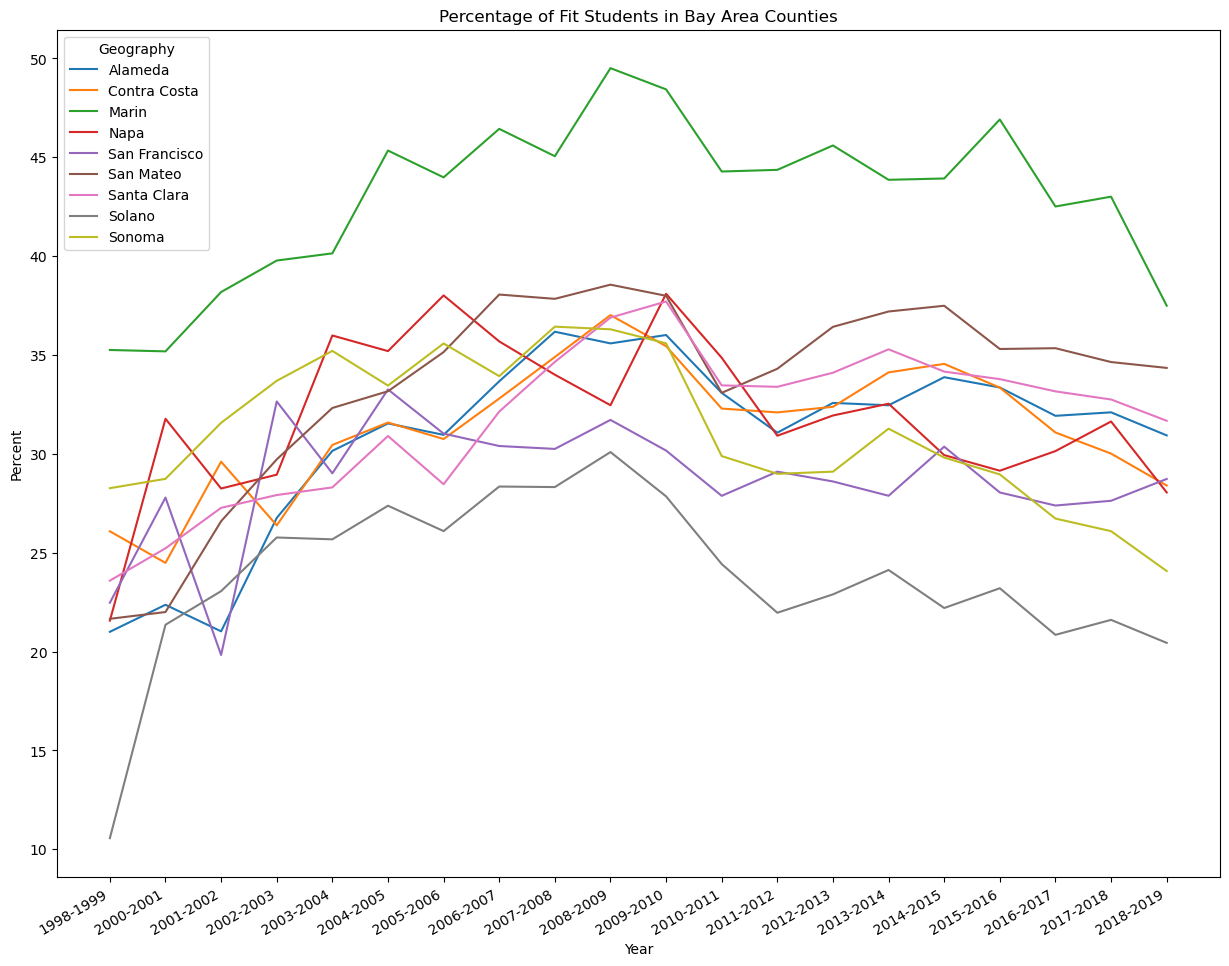

In [37]:
bay_fit_students = df_fit_students[df_fit_students['Geography'].isin(bay_counties)]
fig, ax = plt.subplots(figsize=(15, 11))
sns.lineplot(data=bay_fit_students, x='Year', y='Percent', hue='Geography')
plt.title('Percentage of Fit Students in Bay Area Counties')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [38]:
fit_bay_students_average_per_year = bay_fit_students.groupby('Year', as_index=False).median('Percent')
fit_bay_students_average_per_year

,Year,Percent,Error
0,1998-1999,22.470000,0.553333
1,2000-2001,25.223333,0.583333
2,2001-2002,27.270000,0.596667
3,2002-2003,28.946667,0.603333
4,2003-2004,30.450000,0.603333
5,2004-2005,33.166667,0.623333
6,2005-2006,31.023333,0.616667
7,2006-2007,33.670000,0.646667
8,2007-2008,34.896667,0.643333
9,2008-2009,36.300000,0.676667


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

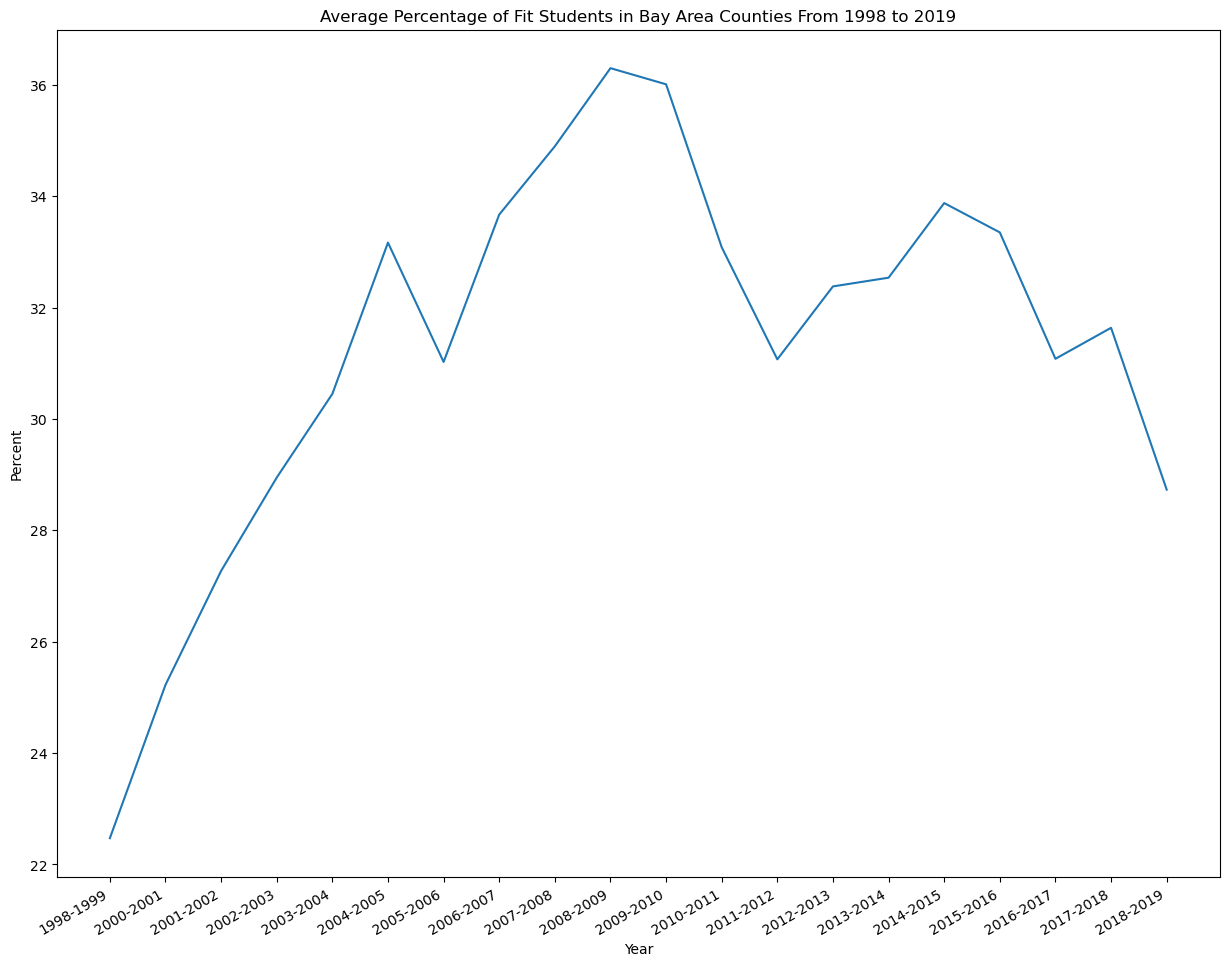

In [39]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.lineplot(data=fit_bay_students_average_per_year, x='Year', y='Percent')
plt.title('Average Percentage of Fit Students in Bay Area Counties From 1998 to 2019')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#### Cleaning and Analyzing health_index Dataset

In [40]:
health_index

,Latitude,Longitude,Totalenrollment,Asthmaer Rate,Bipoc Over90,Ca Av Asthmaer Rate,Ca Av Chronicabsenteeismrate,Ca Av Diabetes Crudeprev,Ca Av Hosp Mentalhealth,Ca Av Hpi Index,...,Percentfrpl Quartile,Percentfrpl,Percenthomeless,Percentnonwhite,School,Schools In County,Schools In District,Suspensionratetotal,Urban,vehicle_access
0,34.033860,-118.18582,14965,56.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,6,75.900001526,0.699999988,90.900001526,City of Angels,2005,938,0,urban,12.0
1,38.609400,-121.34676,6696,61.1,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,3.200000048,49.900001526,Visions In Education,346,69,0,urban,2.3
2,34.261787,-118.52343,5675,27.9,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,50.700000763,0.300000012,72.300003052,Granada Hills Charter,2005,938,0.3,urban,6.1
3,36.753917,-119.78923,4733,110.8,1.0,54.599998,32.099998,10.4,4.7,47.900002,...,8,91.599998474,0.300000012,92.5,J. E. Young Academic Center,290,103,0.4,urban,14.5
4,33.954072,-117.56779,4580,31.8,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,4,58,0.200000003,83.099998474,Eleanor Roosevelt High,454,50,2.8,urban,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,39.534341,-123.45338,101,44.3,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,66.300003052,0,21.100000381,Sherwood,37,7,0,rural,5.8
8575,33.347369,-117.23808,100,24.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,82,1,87.300003052,Ivy High (Continuation),670,2,2.7,urban,0.8
8576,34.299866,-118.83203,100,29.7,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,2,11,0,36.900001526,The High School at Moorpark College,187,10,3.9,urban,3.3
8577,34.643112,-120.45905,100,49.6,NaN,54.599998,32.099998,10.4,4.7,47.900002,...,6,75,7,74.5,Mission Valley,100,16,0,urban,12.2


In [41]:
health_index.columns

Index(['Latitude', 'Longitude', 'Totalenrollment', 'Asthmaer Rate',
       'Bipoc Over90', 'Ca Av Asthmaer Rate', 'Ca Av Chronicabsenteeismrate',
       'Ca Av Diabetes Crudeprev', 'Ca Av Hosp Mentalhealth',
       'Ca Av Hpi Index', 'Ca Av Pct Poverty Under18', 'Ca Av Pct Teenbirth',
       'Ca Av Pct Uninsured Under19', 'Ca Av Percentel', 'Ca Av Percentfoster',
       'Ca Av Percentfrpl', 'Ca Av Percenthomeless',
       'Ca Av Suspensionratetotal', 'ca_av_hpsa_enc',
       'ca_av_percent_fullyvacc', 'ca_av_vehicle_access', 'Charter',
       'Chronicabsenteeismrate', 'County Need Ratio', 'County',
       'Cumulativeenrollment', 'Diabetes Crudeprev', 'District Need Ratio',
       'District', 'Eilname', 'Elenrollment', 'Fosterenrollment',
       'Frplenrollment', 'has_sbhc', 'Hn Schools In County',
       'Hn Schools In District', 'Homelessenrollment', 'Hosp Mentalhealth',
       'Hpi Index', 'Hpsa Enc', 'Need Score Quartile', 'Need Score',
       'Need Text', 'Nonwhiteenrollment', 'Pct

In [42]:
df_health_index = health_index[['County', 'District', 'Asthmaer Rate', 'Diabetes Crudeprev', 'Pct Teenbirth', 'percent_fullyvacc', 'has_sbhc', 'Hosp Mentalhealth', 'Hpsa Enc', 'Hpi Index']]

In [43]:
bay_health_index = df_health_index[health_index['County'].isin(bay_counties)]

In [44]:
bay_health_index.isnull().any()

County                False
District              False
Asthmaer Rate         False
Diabetes Crudeprev    False
Pct Teenbirth         False
percent_fullyvacc      True
has_sbhc              False
Hosp Mentalhealth     False
Hpsa Enc              False
Hpi Index              True
dtype: bool

In [45]:
bay_health_index["Hpi Index"] = bay_health_index.groupby("County")['Hpi Index'].transform(lambda x: x.fillna(round(x.mean(), 1)))

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_3834/427131758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bay_health_index["Hpi Index"] = bay_health_index.groupby("County")['Hpi Index'].transform(lambda x: x.fillna(round(x.mean(), 1)))


In [46]:
bay_health_index["percent_fullyvacc"] = bay_health_index.groupby("District")['percent_fullyvacc'].transform(lambda x: x.fillna(round(x.mean(), 1)))

/var/folders/zv/12b8bw255gq0rngyjsrcn3v40000gn/T/ipykernel_3834/31179228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bay_health_index["percent_fullyvacc"] = bay_health_index.groupby("District")['percent_fullyvacc'].transform(lambda x: x.fillna(round(x.mean(), 1)))


Starting the process of making a health score for each Bay Area county based off of the columns I chose.

In [47]:
# using mean normalization to normalize data because I want to eventually predict scores with some form of regression
normalized_bay_health_index = bay_health_index.copy()
normalized_bay_health_index['has_sbhc'] = pd.Series(np.where(normalized_bay_health_index['has_sbhc'].values == 'Yes', 1, 0),normalized_bay_health_index.index)
for column in normalized_bay_health_index.columns[2:]: 
    normalized_bay_health_index[column] = (normalized_bay_health_index[column] - normalized_bay_health_index[column].mean()) / normalized_bay_health_index[column].std()

In [48]:
normalized_bay_health_index[['Asthmaer Rate', 'Diabetes Crudeprev', 'Pct Teenbirth', 'Hosp Mentalhealth', 'Hpsa Enc']] = normalized_bay_health_index[['Asthmaer Rate', 'Diabetes Crudeprev', 'Pct Teenbirth', 'Hosp Mentalhealth', 'Hpsa Enc']]*-1

In [49]:
# created a health index based off of the health indicators by simply adding the columns
normalized_bay_health_index['naive_health_index'] = normalized_bay_health_index['Asthmaer Rate'] + normalized_bay_health_index['Diabetes Crudeprev'] + normalized_bay_health_index['Pct Teenbirth'] + normalized_bay_health_index['percent_fullyvacc'] + normalized_bay_health_index['has_sbhc'] + normalized_bay_health_index['Hosp Mentalhealth']  + normalized_bay_health_index['Hpi Index']
min_score = min(normalized_bay_health_index['naive_health_index'])
max_score = max(normalized_bay_health_index['naive_health_index'])

# make scores more readable, 1 is least healthy, 10 is most healthy
normalized_bay_health_index['naive_health_index'] = 1 + (((normalized_bay_health_index['naive_health_index'] - min_score) / (max_score - min_score))*9)
normalized_bay_health_index

,County,District,Asthmaer Rate,Diabetes Crudeprev,Pct Teenbirth,percent_fullyvacc,has_sbhc,Hosp Mentalhealth,Hpsa Enc,Hpi Index,naive_health_index
12,Contra Costa,Pittsburg Unified,-1.998404,-0.637784,-1.430139,-0.584565,-0.273032,-0.650135,0.203365,-1.939086,3.537785
17,Alameda,New Haven Unified,-0.140775,-0.302321,-0.418234,-0.265374,3.660175,-0.182780,0.203365,-0.120927,6.982191
21,Alameda,Dublin Unified,0.626135,1.279146,0.343671,1.883031,3.660175,-0.182780,0.203365,0.680717,9.124697
24,Contra Costa,San Ramon Valley Unified,0.962115,1.470839,1.046052,1.883031,-0.273032,-0.650135,0.203365,1.180711,8.180591
28,Alameda,Berkeley Unified,0.891511,1.758378,0.105576,-4.537632,3.660175,-0.182780,0.203365,-1.674627,6.201187
...,...,...,...,...,...,...,...,...,...,...,...
8534,San Francisco,San Francisco Unified,-1.713551,-2.650560,-2.894425,1.883031,-0.273032,1.312756,-5.671681,-2.050655,3.936110
8554,Alameda,Oakland Unified,-1.053764,-2.746407,-0.775377,-0.105778,-0.273032,-0.182780,0.203365,-1.298598,3.918681
8564,Alameda,Pleasanton Unified,0.645613,0.751990,0.629385,0.446669,-0.273032,-0.182780,0.203365,0.536090,7.096795
8565,Alameda,Castro Valley Unified,-0.031217,0.176911,0.748433,0.495775,-0.273032,-0.182780,0.203365,0.978234,6.869967


Take average of each based on county. The naive_health_index column most likely won't be used later.

In [50]:
avg_normalized_bay_health_index = normalized_bay_health_index.groupby('County', as_index=False).mean(['Asthmaer Rate', 'Diabetes Crudeprev', "Pct Teenbirth", 'percent_fullyvacc', 'has_sbhc', 'Hosp Mentalhealth', 'Hpi Index', 'Hpsa Enc','naive_health_index'])
avg_normalized_bay_health_index

,County,Asthmaer Rate,Diabetes Crudeprev,Pct Teenbirth,percent_fullyvacc,has_sbhc,Hosp Mentalhealth,Hpsa Enc,Hpi Index,naive_health_index
0,Alameda,-0.482622,-0.070067,-0.364913,0.074451,0.023143,-0.182780,-0.019098,-0.241482,5.754018
1,Contra Costa,-0.344950,0.031395,-0.002724,0.104167,-0.050097,-0.638782,0.203365,-0.011081,5.871459
2,Marin,0.748287,0.333075,0.911200,0.722893,0.066038,-0.463192,0.203365,0.716481,7.266788
3,Napa,0.281600,0.063265,0.148433,-0.886570,0.401232,1.499698,0.203365,-0.134622,6.679312
4,San Francisco,0.238497,0.022685,0.199191,0.188637,0.370584,1.312756,-0.651187,0.230422,7.099919
5,San Mateo,0.378578,0.081675,0.381509,0.335945,-0.247980,0.097633,-0.395366,0.516008,6.739530
6,Santa Clara,0.482222,-0.051048,0.025750,0.299947,0.056507,1.024259,0.203365,0.099754,6.878828
7,Solano,-1.298235,-0.304525,-0.586816,-1.776948,-0.182614,-0.463192,0.203365,-0.805634,4.278493
8,Sonoma,0.313201,0.183496,0.179367,-0.696367,-0.152934,-2.332612,-0.168230,-0.206977,5.234839


#### Cleaning and Analyzing grad_rate Datasets

In [80]:
grad_rate = pd.concat([grad_rate_17_18, grad_rate_18_19, grad_rate_19_20, grad_rate_20_21, grad_rate_21_22], ignore_index=True)
grad_rate

,ReportingYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,DASS,...,Seal of Biliteracy (Count),Seal of Biliteracy (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate),Transfers (Count),Transfers (Rate),Dropout (Count),Dropout (Rate)
0,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,989,13.6,1928,26.5,80,1.0,62,0.8,615,7.6
1,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,599,8.1,1567,21.1,103,1.2,89,1.0,1076,12.4
2,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,685,19.9,1570,45.7,26,0.7,22,0.6,150,4.1
3,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,30,1.8,112,6.8,30,1.4,22,1.1,384,18.4
4,2017-18,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,...,1,2.6,4,10.3,1,1.6,5,8.1,17,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101185,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,0.4,5,0.7,12,1.6,449,61.6
1101186,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,5,0.5,13,1.2,51,1.3,98,2.5,2651,68.5
1101187,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,0,0.0,1,1.4,0,0.0,6,3.9,75,48.7
1101188,2021-22,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,...,37,0.4,198,2.3,264,1.1,634,2.7,13951,59.6


In [81]:
grad_rate = grad_rate[['ReportingYear', 
                       'CountyName',
                       'Regular HS Diploma Graduates (Rate)', 
                       "Met UC/CSU Grad Req's (Rate)", 
                       'Golden State Seal Merit Diploma (Rate',
                       'Dropout (Rate)']]

,ReportingYear,CountyName,Regular HS Diploma Graduates (Rate),Met UC/CSU Grad Req's (Rate),Golden State Seal Merit Diploma (Rate,Dropout (Rate)
0,2017-18,Alameda,90.6,60.9,26.5,7.6
1,2017-18,Alameda,85.4,50.4,21.1,12.4
2,2017-18,Alameda,94.5,75.3,45.7,4.1
3,2017-18,Alameda,79.2,35.6,6.8,18.4
4,2017-18,Alameda,62.9,51.3,10.3,27.4
...,...,...,...,...,...,...
1101185,2021-22,State,36.1,2.7,0.4,61.6
1101186,2021-22,State,27.7,5.3,1.2,68.5
1101187,2021-22,State,47.4,0.0,1.4,48.7
1101188,2021-22,State,36.6,8.4,2.3,59.6


In [82]:
bay_grad_rate = grad_rate[grad_rate['CountyName'].isin(bay_counties)]

In [84]:
bay_grad_rate['Regular HS Diploma Graduates (Rate)'].value_counts()

Regular HS Diploma Graduates (Rate)
*        99396
100.0     6059
93.8       744
92.9       737
90.9       734
         ...  
49.8         1
11.2         1
24.8         1
18.7         1
39.8         1
Name: count, Length: 962, dtype: int64

In [85]:
bay_grad_rate[bay_grad_rate['CountyName'] == 'Alameda']

,ReportingYear,CountyName,Regular HS Diploma Graduates (Rate),Met UC/CSU Grad Req's (Rate),Golden State Seal Merit Diploma (Rate,Dropout (Rate)
0,2017-18,Alameda,90.6,60.9,26.5,7.6
1,2017-18,Alameda,85.4,50.4,21.1,12.4
2,2017-18,Alameda,94.5,75.3,45.7,4.1
3,2017-18,Alameda,79.2,35.6,6.8,18.4
4,2017-18,Alameda,62.9,51.3,10.3,27.4
...,...,...,...,...,...,...
1055644,2021-22,Alameda,*,*,*,*
1055645,2021-22,Alameda,*,*,*,*
1055646,2021-22,Alameda,*,*,*,*
1055647,2021-22,Alameda,*,*,*,*


In [86]:
# use MLE to impute censored data

In [52]:
avg_bay_grad_rate = bay_grad_rate.groupby(['ReportingYear', 'CountyName'], as_index=False).mean()

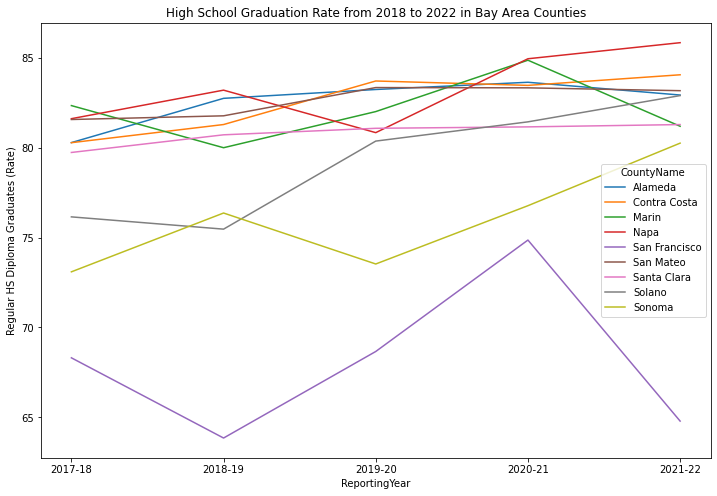

In [53]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_bay_grad_rate, x='ReportingYear', y='Regular HS Diploma Graduates (Rate)', hue='CountyName')
plt.title('High School Graduation Rate from 2018 to 2022 in Bay Area Counties')
plt.show()

In [54]:
avg_bay_grad_rate_per_year = bay_grad_rate.groupby('ReportingYear', as_index=False).mean()
avg_bay_grad_rate_per_year

,ReportingYear,Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),Met UC/CSU Grad Req's (Count),Met UC/CSU Grad Req's (Rate),Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Non-Graduate Completers (Count),Non-Graduate Completers (Rate)
0,2017-18,162.185693,78.504917,81.053341,36.905941,38.552962,14.695955,3.391260,2.396881
1,2018-19,168.876029,79.292850,84.337982,36.371364,41.821738,15.351197,3.829860,2.349487
2,2019-20,167.600268,80.561970,83.937627,37.406087,47.638701,17.965808,3.458669,2.333435
3,2020-21,170.915001,81.690364,86.932901,38.084147,45.978455,17.427928,3.537060,2.191018
4,2021-22,261.129856,81.373202,140.137476,39.463490,72.176003,16.811011,5.276561,2.382646


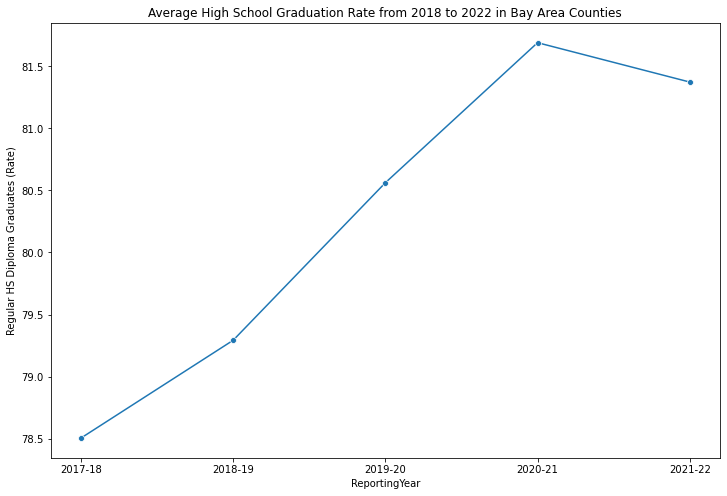

In [55]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_bay_grad_rate_per_year, x='ReportingYear', y='Regular HS Diploma Graduates (Rate)', marker='o')
plt.title('Average High School Graduation Rate from 2018 to 2022 in Bay Area Counties')
plt.show()

In [56]:
math_17_18

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,...,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
1114,CALIFORNIA,6,600001,CA-1975309,Acton-Agua Dulce Unified,27MAR19,584,37,2,PS,...,81,35-39,98,50-54,76,30-34,88,35-39,86,15-19
1115,CALIFORNIA,6,600002,CA-0131609,California School for the Blind (State Special...,27MAR19,19,LE20,NaN,NaN,...,1,PS,4,PS,5,PS,5,PS,3,PS
1116,CALIFORNIA,6,600003,CA-0131617,California School for the Deaf-Fremont (State ...,27MAR19,168,6-9,NaN,NaN,...,17,LE20,29,LE20,23,LE20,25,LE20,45,LE10
1117,CALIFORNIA,6,600006,CA-2175002,Ross Valley Elementary,27MAR19,1422,70,3,PS,...,193,65-69,271,65-69,249,65-69,264,65-69,NaN,NaN
1118,CALIFORNIA,6,600007,CA-3331625,California Sch for the Deaf-Riverside (State S...,27MAR19,158,6-9,NaN,NaN,...,17,LE20,17,LE20,21,LE20,28,LE20,30,LE20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,CALIFORNIA,6,691122,CA-4810488,Solano County Office of Education,27MAR19,125,LE5,1,PS,...,10,LT50,11,LT50,21,LE20,19,LE20,38,LE10
2111,CALIFORNIA,6,691134,CA-1075234,Golden Plains Unified,27MAR19,943,12,1,PS,...,136,6-9,154,6-9,122,10-14,161,10-14,119,6-9
2112,CALIFORNIA,6,691135,CA-3375242,Val Verde Unified,27MAR19,10837,27,33,20-29,...,1591,27,1633,25,1599,21,1558,17,1551,21
2113,CALIFORNIA,6,691136,CA-3575259,Aromas/San Juan Unified,27MAR19,563,29,2,PS,...,78,20-24,84,30-34,84,25-29,85,35-39,74,20-24


In [57]:
math_17_18['LEANM'].unique()

array(['Acton-Agua Dulce Unified',
       'California School for the Blind (State Special Schl)',
       'California School for the Deaf-Fremont (State Special Schl)',
       'Ross Valley Elementary',
       'California Sch for the Deaf-Riverside (State Special Schl)',
       'Cuyama Joint Unified', 'Fort Sage Unified',
       'Twin Ridges Elementary', 'Rocklin Unified', 'Hesperia Unified',
       'Lucerne Valley Unified', 'Upland Unified', 'Apple Valley Unified',
       'Mountain Valley Unified', 'Dublin Unified', 'Pleasanton Unified',
       'Sunol Glen Unified', 'Mendota Unified', 'Manhattan Beach Unified',
       'El Tejon Unified', 'Lake Elsinore Unified',
       'Temecula Valley Unified', 'Murrieta Valley Unified',
       'Big Sur Unified', 'Redondo Beach Unified',
       'Dos Palos Oro Loma Joint Unified', 'Windsor Unified',
       'Farmersville Unified', 'Natomas Unified', 'Ferndale Unified',
       'Mattole Unified', 'Delhi Unified', 'Riverdale Joint Unified',
       'Warner U

In [58]:
bay_math_17_18 = math_17_18[math_17_18['LEANM'].isin(bay_districts)]
bay_math_17_18

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718,MAM_MTH00NUMVALID_1718,MAM_MTH00PCTPROF_1718,...,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
1117,CALIFORNIA,6,600006,CA-2175002,Ross Valley Elementary,27MAR19,1422,70,3,PS,...,193,65-69,271,65-69,249,65-69,264,65-69,NaN,NaN
1128,CALIFORNIA,6,600019,CA-0175093,Dublin Unified,27MAR19,6004,73,16,GE80,...,912,75,901,70,828,72,787,69,635,63
1129,CALIFORNIA,6,600020,CA-0175101,Pleasanton Unified,27MAR19,8015,76,7,LT50,...,1111,76,1162,77,1253,79,1244,75,1135,68
1130,CALIFORNIA,6,600021,CA-0175119,Sunol Glen Unified,27MAR19,181,85-89,NaN,NaN,...,33,80-89,32,GE90,30,GE80,19,60-79,NaN,NaN
1140,CALIFORNIA,6,600034,CA-4975358,Windsor Unified,27MAR19,2581,31,23,21-39,...,373,27,341,28,377,27,427,33,398,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,CALIFORNIA,6,641790,CA-4970995,Waugh Elementary,27MAR19,473,64,NaN,NaN,...,120,45-49,114,70-74,NaN,NaN,NaN,NaN,NaN,NaN
2029,CALIFORNIA,6,642270,CA-4971001,West Side Union Elementary,27MAR19,92,50-54,NaN,NaN,...,24,40-59,20,21-39,NaN,NaN,NaN,NaN,NaN,NaN
2043,CALIFORNIA,6,642750,CA-4971019,Wilmar Union Elementary,27MAR19,117,60-64,1,PS,...,26,60-79,33,50-59,NaN,NaN,NaN,NaN,NaN,NaN
2049,CALIFORNIA,6,643140,CA-4169088,Woodside Elementary,27MAR19,263,84,NaN,NaN,...,47,80-89,35,70-79,48,80-89,36,70-79,NaN,NaN


In [59]:
bay_math_17_18 = bay_math_17_18[['LEANM', 'ALL_MTH00PCTPROF_1718']]
bay_math_17_18

,LEANM,ALL_MTH00PCTPROF_1718
1117,Ross Valley Elementary,70
1128,Dublin Unified,73
1129,Pleasanton Unified,76
1130,Sunol Glen Unified,85-89
1140,Windsor Unified,31
...,...,...
2018,Waugh Elementary,64
2029,West Side Union Elementary,50-54
2043,Wilmar Union Elementary,60-64
2049,Woodside Elementary,84


In [60]:
county = np.array([])
for i in range(len(bay_math_17_18['LEANM'])):
    for v in district_to_county.keys():
        if bay_math_17_18['LEANM'].iloc[i] in district_to_county[v]:
            county = np.append(county, v)
bay_math_17_18 = bay_math_17_18.reset_index()
bay_math_17_18['county'] = pd.Series(county)
bay_math_17_18

,index,LEANM,ALL_MTH00PCTPROF_1718,county
0,1117,Ross Valley Elementary,70,Marin
1,1128,Dublin Unified,73,Alameda
2,1129,Pleasanton Unified,76,Alameda
3,1130,Sunol Glen Unified,85-89,Alameda
4,1140,Windsor Unified,31,Sonoma
...,...,...,...,...
153,2018,Waugh Elementary,64,Sonoma
154,2029,West Side Union Elementary,50-54,Sonoma
155,2043,Wilmar Union Elementary,60-64,Sonoma
156,2049,Woodside Elementary,84,San Mateo


In [61]:
bay_math_17_18['ALL_MTH00PCTPROF_1718'].unique()

array(['70', '73', '76', '85-89', '31', '68', '60', '50-54', '30', '40',
       '18', '32', '23', '77', '52', '59', '56', '20-29', '50', '51',
       '46', '37', '62', '49', '43', '60-69', '61', '25-29', '28', '86',
       '34', '60-64', '21', 'LT50', '38', '72', '75', '30-34', '40-44',
       '45-49', '26', '84', '50-59', 'GE50', '45', '36', '55-59', '20-24',
       '81', '58', '80-89', '69', '82', '74', '42', '64', '80', '79',
       '30-39', '21-39', '63', '39', '24', '40-59', '27', '83', '85',
       '20', '11-19', '15', '44', 'PS', '33', '25', '55', '90', '47',
       '71', '35'], dtype=object)

In [62]:
bay_math_17_18['ALL_MTH00PCTPROF_1718'] = pd.to_numeric(bay_math_17_18['ALL_MTH00PCTPROF_1718'].str.slice(stop=2), errors='coerce', downcast='integer')

In [82]:
bay_math_17_18 = bay_math_17_18.groupby('county', as_index=False).mean('ALL_MTH00PCTPROF_1718')[['county', 'ALL_MTH00PCTPROF_1718']]
bay_math_17_18

,county,ALL_MTH00PCTPROF_1718
0,Alameda,51.187500
1,Contra Costa,48.777778
2,Marin,51.866667
3,Napa,34.200000
4,San Francisco,50.000000
5,San Mateo,55.000000
6,Santa Clara,58.483871
7,Solano,36.166667
8,Sonoma,41.432432


In [88]:
bay_math_18_19 = math_18_19[math_18_19['LEANM'].isin(bay_districts)]

county = np.array([])
for i in range(len(bay_math_18_19['LEANM'])):
    for v in district_to_county.keys():
        if bay_math_18_19['LEANM'].iloc[i] in district_to_county[v]:
            county = np.append(county, v)
bay_math_18_19 = bay_math_18_19.reset_index()
bay_math_18_19['county'] = pd.Series(county)

bay_math_18_19['ALL_MTH00pctprof_1819'] = pd.to_numeric(bay_math_18_19['ALL_MTH00pctprof_1819'].str.slice(stop=2), errors='coerce', downcast='integer')

bay_math_18_19 = bay_math_18_19.groupby('county', as_index=False).mean('ALL_MTH00pctprof_1819')[['county', 'ALL_MTH00pctprof_1819']]

In [89]:
bay_math_18_19

,county,ALL_MTH00pctprof_1819
0,Alameda,51.937500
1,Contra Costa,48.944444
2,Marin,52.800000
3,Napa,41.600000
4,San Francisco,50.000000
5,San Mateo,55.166667
6,Santa Clara,58.166667
7,Solano,36.333333
8,Sonoma,43.435897


In [77]:
bay_math_20_21 = math_20_21[math_20_21['LEANM'].isin(bay_districts)]

county = np.array([])
for i in range(len(bay_math_20_21['LEANM'])):
    for v in district_to_county.keys():
        if bay_math_20_21['LEANM'].iloc[i] in district_to_county[v]:
            county = np.append(county, v)
bay_math_20_21 = bay_math_20_21.reset_index()
bay_math_20_21['county'] = pd.Series(county)

bay_math_20_21['PCTPROF'] = pd.to_numeric(bay_math_20_21['PCTPROF'].str.slice(stop=2), errors='coerce', downcast='integer')

bay_math_20_21 = bay_math_20_21.groupby('county', as_index=False).mean('PCTPROF')[['county', 'PCTPROF']]

In [78]:
bay_math_20_21

,county,PCTPROF
0,Alameda,49.457627
1,Contra Costa,46.562791
2,Marin,44.030960
3,Napa,23.066667
4,San Francisco,62.142857
5,San Mateo,46.939355
6,Santa Clara,55.118790
7,Solano,22.666667
8,Sonoma,31.924324


In [93]:
bay_math_passing_scores = bay_math_17_18.merge(bay_math_18_19, on='county', how='inner')

In [94]:
bay_math_passing_scores = bay_math_passing_scores.merge(bay_math_20_21, on='county', how='inner')

In [98]:
bay_math_passing_scores = bay_math_passing_scores.rename(columns={"county": "County", 
                                        "ALL_MTH00PCTPROF_1718": "2017-2018", 
                                        "ALL_MTH00pctprof_1819": "2018-2019",
                                        "PCTPROF": "2020-2021"})

In [99]:
bay_math_passing_scores

,County,2017-2018,2018-2019,2020-2021
0,Alameda,51.187500,51.937500,49.457627
1,Contra Costa,48.777778,48.944444,46.562791
2,Marin,51.866667,52.800000,44.030960
3,Napa,34.200000,41.600000,23.066667
4,San Francisco,50.000000,50.000000,62.142857
5,San Mateo,55.000000,55.166667,46.939355
6,Santa Clara,58.483871,58.166667,55.118790
7,Solano,36.166667,36.333333,22.666667
8,Sonoma,41.432432,43.435897,31.924324


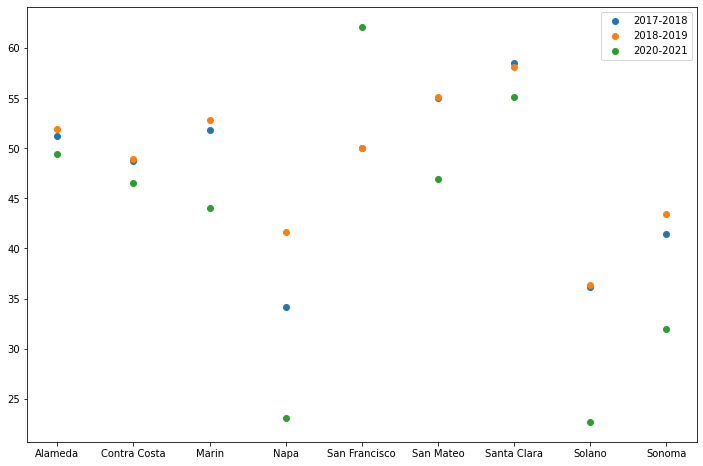

In [113]:
plt.figure(figsize=(12, 8))
plt.scatter(bay_math_passing_scores['County'], bay_math_passing_scores['2017-2018'], label='2017-2018')
plt.scatter(bay_math_passing_scores['County'], bay_math_passing_scores['2018-2019'], label='2018-2019')
plt.scatter(bay_math_passing_scores['County'], bay_math_passing_scores['2020-2021'], label='2020-2021')
plt.legend()
plt.show()

In [105]:
bay_math_passing_scores.set_index('County').T

County,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
2017-2018,51.187500,48.777778,51.866667,34.200000,50.000000,55.000000,58.483871,36.166667,41.432432
2018-2019,51.937500,48.944444,52.800000,41.600000,50.000000,55.166667,58.166667,36.333333,43.435897
2020-2021,49.457627,46.562791,44.030960,23.066667,62.142857,46.939355,55.118790,22.666667,31.924324
